In [1]:
import os
import codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [4]:
content_length = []
for file in os.listdir('./data/train/data'):
    with codecs.open('./data/train/data/'+file, "r", encoding="utf-8") as f:
        content_str = f.read()
        content_length.append(len(content_str))

In [5]:
np.percentile(content_length,95)

366.0

In [6]:
content_length = pd.Series(content_length)

In [7]:
content_length[content_length>500].shape

(43,)

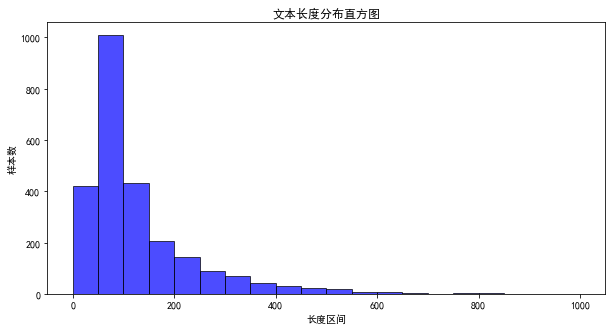

In [9]:
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
plt.figure(figsize=(10,5))
plt.hist(content_length, bins=20, range=(0,1000),facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("长度区间")
# 显示纵轴标签
plt.ylabel("样本数")
# 显示图标题
plt.title("文本长度分布直方图")
plt.show()

标签分布

In [12]:
df = pd.DataFrame()
for file in os.listdir('./data/train/label'):
    dta = pd.read_csv('./data/train/label/'+file,names=['Id','Category','Pos_b','Pos_e','Privacy'])
    dta = dta[['Id','Category','Pos_b','Pos_e','Privacy']]       
    df = pd.concat([df,dta])

In [13]:
df.head().append(df.tail())

,Id,Category,Pos_b,Pos_e,Privacy
0,ID,Category,Pos_b,Pos_e,Privacy
1,0,position,66,75,香港电影国语配音名家
2,0,name,76,78,周思平
3,0,movie,87,91,《上海滩》
4,0,name,92,94,周润发
6,999,movie,39,44,《渴望激情》
7,999,movie,45,50,《昨日英雄》
8,999,movie,51,56,《保卫爱情》
9,999,position,67,78,上海影评人奖”最佳男演员
10,999,name,27,28,南帝


In [14]:
df.groupby("Category").count().reset_index()[['Category','Id']].sort_values(by='Id',ascending=False)

,Category,Id
12,position,3580
10,name,3422
0,Category,2515
11,organization,2329
4,company,2150
2,address,2056
9,movie,1901
6,game,1571
7,government,1187
13,scene,990


In [16]:
df[df['Category']=='vx'].values

array([['118', 'vx', '80', '86', 'lily潘小芬'],
       ['1345', 'vx', '36', '52', 'zhangzhizheng-zzz'],
       ['1503', 'vx', '35', '41', 'wwjshow'],
       ['1566', 'vx', '34', '43', 'rachel-213'],
       ['1801', 'vx', '56', '63', '57150788'],
       ['1801', 'vx', '74', '81', '57150788'],
       ['2010', 'vx', '57', '70', 'tianlangyinyue'],
       ['2164', 'vx', '15', '21', 'waveapp'],
       ['2164', 'vx', '59', '68', 'songxiaobo'],
       ['2181', 'vx', '5', '15', 'hongshui001'],
       ['2181', 'vx', '21', '31', 'hongshui007'],
       ['2189', 'vx', '55', '65', '13426245800'],
       ['2279', 'vx', '71', '86', 'zhuzishanmisstin'],
       ['2335', 'vx', '61', '73', 'zhuzhiyi91510'],
       ['2341', 'vx', '53', '60', 'montager'],
       ['317', 'vx', '76', '87', 'mengmeng6570'],
       ['397', 'vx', '63', '77', 'liushasha319439'],
       ['667', 'vx', '62', '71', '1827967769'],
       ['762', 'vx', '7', '12', 'sjyy98']], dtype=object)

In [17]:
df[df['Category']=='QQ'].values

array([['1063', 'QQ', '89', '97', '371451138'],
       ['1168', 'QQ', '34', '42', '924969718'],
       ['1334', 'QQ', '44', '52', '490401933'],
       ['138', 'QQ', '21', '29', '826929452'],
       ['1479', 'QQ', '8', '16', '160308912'],
       ['1590', 'QQ', '54', '61', '33370722'],
       ['1699', 'QQ', '64', '71', '14705257'],
       ['1730', 'QQ', '44', '52', '114281231'],
       ['1766', 'QQ', '45', '53', '783594553'],
       ['1939', 'QQ', '50', '58', '130238288'],
       ['1994', 'QQ', '7', '17', '18618193311'],
       ['2112', 'QQ', '68', '75', '53344829'],
       ['2181', 'QQ', '83', '90', '89359735'],
       ['2181', 'QQ', '47', '56', '1787817738'],
       ['2241', 'QQ', '23', '31', '449801320'],
       ['2241', 'QQ', '45', '53', '574785760'],
       ['2251', 'QQ', '20', '29', '1143175993'],
       ['2259', 'QQ', '63', '71', '527622886'],
       ['2365', 'QQ', '38', '46', '776979804'],
       ['2416', 'QQ', '57', '65', '326597719'],
       ['2514', 'QQ', '6', '14', '229215757

In [18]:
df.groupby("Privacy").count().reset_index()[['Privacy','Id']].sort_values(by='Id',ascending=False)

,Privacy,Id
729,Privacy,2515
10113,记者,356
8546,演员,153
7958,歌手,93
3760,主持人,91
...,...,...
4235,偶然当演员,1
4236,傅思建,1
4237,傅硕,1
4238,傅艺伟,1


测试集分析

In [19]:
content_length = []
for file in os.listdir('./data/test'):
    with codecs.open('./data/test/'+file, "r", encoding="utf-8") as f:
        content_str = f.read()
        content_length.append(len(content_str))

In [20]:
content_length = pd.Series(content_length)

In [21]:
content_length[content_length>500].shape

(27,)

In [22]:
content_length[content_length>500]

746     1090
782      675
1088     593
1288     634
1403     512
1446     532
1454     773
1459     627
1620     512
1683     566
1898     698
2008     629
2285     541
2332     518
2413     503
2643     635
2781     680
2937     501
2944     525
2990     551
3088    1058
3135     777
3263    1090
3289     632
3553     523
3608     679
3671     511
dtype: int64

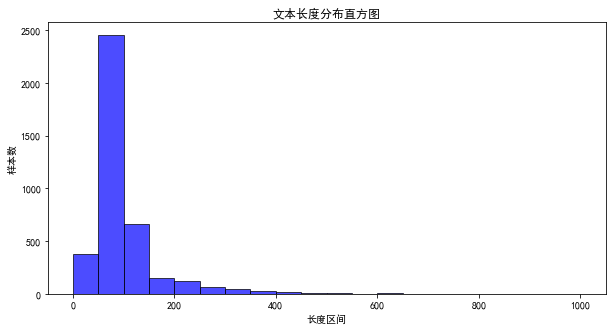

In [23]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
plt.figure(figsize=(10,5))
plt.hist(content_length, bins=20, range=(0,1000),facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("长度区间")
# 显示纵轴标签
plt.ylabel("样本数")
# 显示图标题
plt.title("文本长度分布直方图")
plt.show()